In [ ]:
wandb_project = "https://wandb.ai/neuroneural/holographic_project"

In [27]:
import wandb
import pandas as pd

# Initialize the API
api = wandb.Api()

# Parse your project URL - format is https://wandb.ai/ENTITY/PROJECT
entity = "neuroneural"
project_name = "holographic_project"

# Get all runs from the project
runs = api.runs(f"{entity}/{project_name}")

print(f"Found {len(runs)} runs in the project")

# # Example 1: Get run summaries as a DataFrame
# summary_list = []
# config_list = []
# name_list = []

# for run in runs:
#     # .summary contains the final metrics
#     summary_list.append(run.summary._json_dict)
    
#     # .config contains the hyperparameters
#     config_list.append({k: v for k, v in run.config.items() if not k.startswith('_')})
    
#     # .name is the human-readable name of the run
#     name_list.append(run.name)

# runs_df = pd.DataFrame({
#     "name": name_list,
#     "summary": summary_list,
#     "config": config_list,
# })

# print(runs_df.head())

# # Example 2: Get full history (all logged metrics over time) for a specific run
# run = runs[0]  # Get the first run
# history_df = run.history()  # Returns a pandas DataFrame
# print(f"\nRun '{run.name}' history shape: {history_df.shape}")
# print(history_df.head())

# # Example 3: Download artifacts (models, datasets, etc.)
# # List all artifacts in the project
# artifacts = api.artifacts(type_name="dataset", project=f"{entity}/{project_name}")
# for artifact in artifacts:
#     print(f"Artifact: {artifact.name}, Version: {artifact.version}")
    
#     # Download a specific artifact
#     # artifact_dir = artifact.download()  # Downloads to ./artifacts/artifact_name:version
#     # print(f"Downloaded to: {artifact_dir}")

# Example 4: Get specific runs by filters
# Filter runs by tags, state, or config values
filtered_runs = api.runs(
    f"{entity}/{project_name}",
    filters={
        "state": "finished",  # Only finished runs
        # "tags": {"$in": ["baseline"]},  # Runs with 'baseline' tag
        # "config.learning_rate": 0.001  # Runs with specific config
    }
)

# # Example 5: Download files from a specific run
# run = runs[0]
# files = run.files()
# for file in files:
#     print(f"File: {file.name}")
#     # file.download(replace=True)  # Download the file

Found 14 runs in the project


In [ ]:
runs[0]

In [31]:
runs[0].summary._json_dict

{'_runtime': 3995.367636675,
 '_step': 21720,
 '_timestamp': 1765230508.7265823,
 '_wandb': {'runtime': 3995},
 'accuracy_batch/infer': 1,
 'accuracy_batch/train': 1,
 'accuracy_batch/valid': 1,
 'accuracy_epoch/infer': 0.8,
 'accuracy_epoch/train': 1,
 'accuracy_epoch/valid': 0.9090909090909092,
 'auc_epoch/infer': 0.7911764979362488,
 'auc_epoch/train': 1,
 'auc_epoch/valid': 0.8421052694320679,
 'learning rate_batch/infer': 1.0763259172819062e-09,
 'learning rate_batch/train': 1.0763259172819062e-09,
 'learning rate_batch/valid': 1.0763259172819062e-09,
 'learning rate_epoch/infer': 1.0763259172819062e-09,
 'learning rate_epoch/train': 5.271448762049492e-08,
 'learning rate_epoch/valid': 1.0763259172819062e-09,
 'loss_batch/infer': 0.02172317355871201,
 'loss_batch/train': 0.0017267758958041668,
 'loss_batch/valid': 0.34352004528045654,
 'loss_epoch/infer': 0.6540211722254753,
 'loss_epoch/train': 0.0032114167188410643,
 'loss_epoch/valid': 0.4736203641602487}

In [32]:
accs, aucs = [], []
for run in runs:
    history_df = run.history()
    try:
        history_df = history_df[["accuracy_epoch/infer", "auc_epoch/infer", "loss_epoch/infer"]]
        # history_df.dropna()
        # find min validation loss index, then accuracy and auc
        min_idx = history_df["loss_epoch/infer"].idxmin()
        acc = history_df.loc[min_idx]["accuracy_epoch/infer"]
        auc = history_df.loc[min_idx]["auc_epoch/infer"]
        accs.append(acc)
        aucs.append(auc)
    except Exception as e:
        print(f"Error processing run {run.id}: {e}")

accs = pd.Series(accs)
aucs = pd.Series(aucs)
print(f"Accuracy: mean={accs.mean():.4f}, std={accs.std():.4f}")

Error processing run mqllzcbu: "None of [Index(['accuracy_epoch/infer', 'auc_epoch/infer', 'loss_epoch/infer'], dtype='object')] are in the [columns]"
Error processing run msbbrs8j: "None of [Index(['accuracy_epoch/infer', 'auc_epoch/infer', 'loss_epoch/infer'], dtype='object')] are in the [columns]"
Error processing run bsrecs2w: "None of [Index(['accuracy_epoch/infer', 'auc_epoch/infer', 'loss_epoch/infer'], dtype='object')] are in the [columns]"
Error processing run mdwu2b1n: "None of [Index(['accuracy_epoch/infer', 'auc_epoch/infer', 'loss_epoch/infer'], dtype='object')] are in the [columns]"
Accuracy: mean=0.8587, std=0.1011


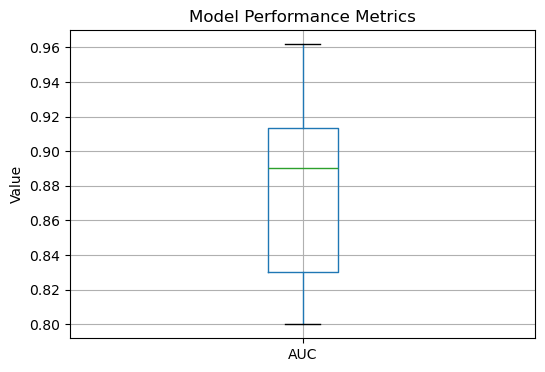

In [36]:
# plot boxplots for accuracy and auc on the same plot
import matplotlib.pyplot as plt
data_to_plot = pd.DataFrame({
    # "Accuracy": accs,
    "AUC": aucs,
    
})
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
data_to_plot.boxplot(ax=ax)
ax.set_title("Model Performance Metrics")
ax.set_ylabel("Value")
plt.show()

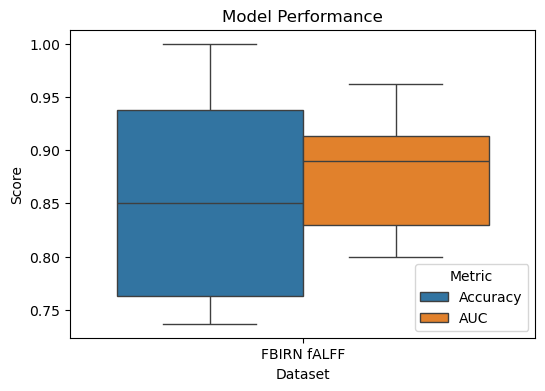

In [37]:
# plot boxplots for accuracy and auc on the same plot
import seaborn as sns
import matplotlib.pyplot as plt
data_to_plot1 = pd.DataFrame({
    "Score": accs,
    "Metric": "Accuracy",
    "Dataset": "FBIRN fALFF"
})
data_to_plot2 = pd.DataFrame({
    "Score": aucs,
    "Metric": "AUC",
    "Dataset": "FBIRN fALFF"
})
data_to_plot = pd.concat([data_to_plot1, data_to_plot2], ignore_index=True)
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# plot scores per dataset using Metric as hue (sns.boxplot would be better for this) 
sns.boxplot(x="Dataset", y="Score", hue="Metric", data=data_to_plot, ax=ax)
ax.set_title("Model Performance")
fig.savefig("boxplot.svg")